In [2]:
import numpy as np
import matplotlib.pyplot as plt

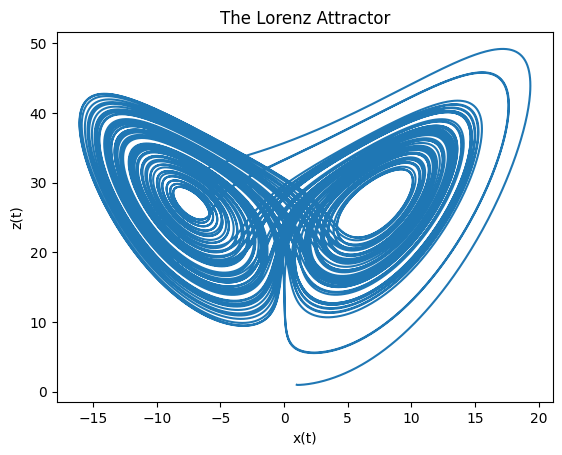

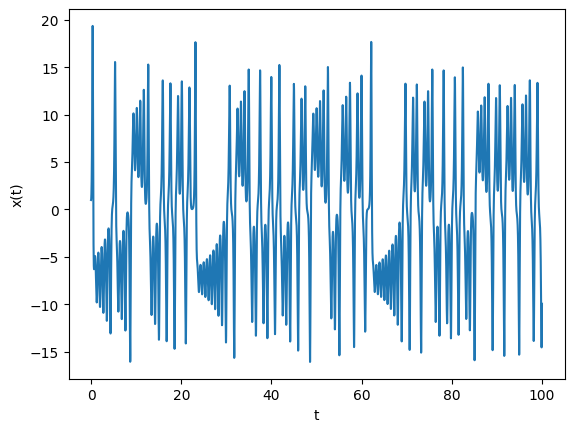

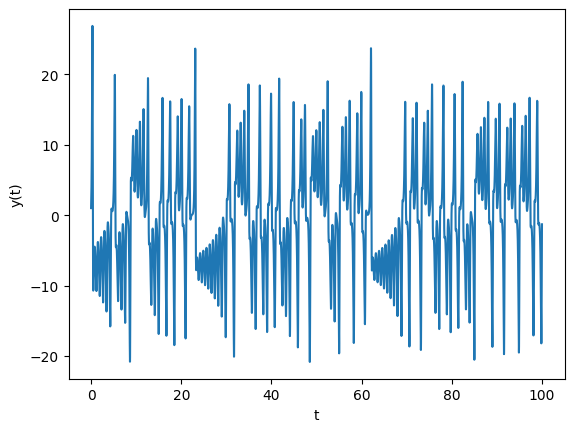

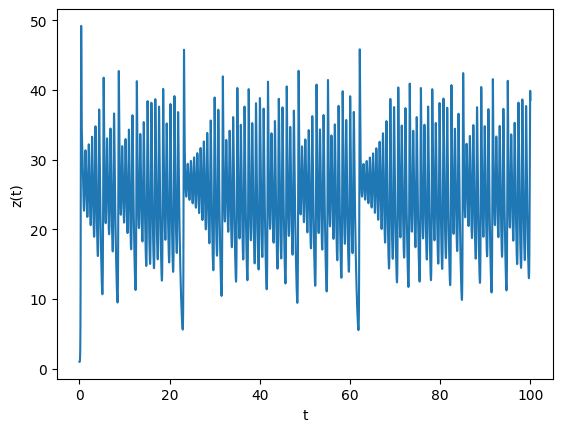

In [3]:
# solving the lorenz system

h = 0.001
t = np.arange(0, 100, h)
x = np.zeros(len(t))
y = np.zeros(len(t))
z = np.zeros(len(t))
sigma = 10
b = 2
r = 28
x[0] = 1
y[0] = 1
z[0] = 1

for i in range(0, len(t) -1):
    k1 = h*sigma*(y[i] - x[i])
    k2 = h* sigma*(y[i] - (x[i] + 0.5*k1))
    k3 = h* sigma*(y[i] - (x[i] + 0.5*k2))
    k4 = h* sigma*(y[i] - (x[i] + k3))
    x[i+1] = x[i] + (k1 + 2*k2 + 2*k3 + k4)/6

    k1_ = h*(r*x[i] - y[i] - x[i]*z[i])
    k2_ = h*(r*x[i] - (y[i] + 0.5*k1_) - x[i]*z[i])
    k3_ = h*(r*x[i] - (y[i] + 0.5*k2_) - x[i]*z[i])
    k4_ = h*(r*x[i] - (y[i] + k3_) - x[i]*z[i])
    y[i+1] = y[i] + (k1_ + 2*k2_ + 2*k3_ + k4_)/6

    k1__ = h*(x[i]*y[i] - b*z[i])
    k2__ = h*(x[i]*y[i] - b*(z[i] + 0.5*k1__))
    k3__ = h*(x[i]*y[i] - b*(z[i] + 0.5*k2__))
    k4__ = h*(x[i]*y[i] - b*(z[i] + k3__))
    z[i+1] = z[i] + (k1__ + 2*k2__ + 2*k3__ + k4__)/6

plt.plot(x,z)
plt.ylabel("z(t)")
plt.xlabel("x(t)")
plt.title("The Lorenz Attractor")
plt.show()
plt.plot(t,x)
plt.ylabel("x(t)")
plt.xlabel("t")
plt.show()
plt.plot(t,y)
plt.ylabel("y(t)")
plt.xlabel("t")
plt.show()
plt.plot(t,z)
plt.ylabel("z(t)")
plt.xlabel("t")
plt.show()

In [4]:
# finding the fixed points/roots

def F(x, y, sigma):
    return sigma * y - sigma * x

def G(x, y, z, r):
    return r * x - y - x * z

def H(x, y, z, b):
    return x * y - b * z

def J(x, y, z, sigma, r, b):
    return np.array([[-sigma, sigma, 0],
                     [r - z, -1, -x],
                     [y, x, -b]])

def Newton_System(J, F, G, H, x0, y0, z0, p, k):
    root = np.zeros((k, 3))
    root[0] = [x0, y0, z0]
    n = 0
    tol = 0.5 * 10**(-p + 1)
    error = tol + 1
    f = np.zeros(3)
    sigma = 10
    b = 2
    r = 28
    while (error > tol and n < k - 1):
        f[0] = F(root[n][0], root[n][1], sigma)
        f[1] = G(root[n][0], root[n][1], root[n][2], r)
        f[2] = H(root[n][0], root[n][1], root[n][2], b)
        delta = -np.linalg.inv(J(root[n][0], root[n][1], root[n][2], sigma, r, b)) @ f
        root[n+1] = root[n] + delta
        error = np.linalg.norm(root[n+1] - root[n]) / np.linalg.norm(root[n+1])
        n = n + 1
    if n >= k:
        print("No convergence")
    else:
        final_r = root[len(root) - 1]
    return final_r

print(Newton_System(J, F, G, H, -7, -6, 26, 20, 20))



[-7.34846923 -7.34846923 27.        ]


In [5]:
# stability analysis for the three found fixed points

det1 = np.linalg.det(J(-7.34846923, -7.34846923, 27, sigma, r, b))
det2 = np.linalg.det(J(7.34846923, 7.34846923, 27, sigma, r, b))
det3 = np.linalg.det(J(0, 0, 0, sigma, r, b))

print("det1 = ", det1)
print("det2 = ", det2)
print("det3 = ", det3)


det1 =  -1080.0000004851363
det2 =  -1080.0000004851363
det3 =  539.9999999999997


In [6]:
# finding the Liapunov exponnet

h = 0.001
t = np.arange(0, 100, h)
x1 = np.zeros(len(t))
x2 = np.zeros(len(t))
y1 = np.zeros(len(t))
y2 = np.zeros(len(t))
z1 = np.zeros(len(t))
z2 = np.zeros(len(t))
sigma = 10
b = 2
r = 28
delta0 = np.zeros(3)
delta0[0] = 0.5
delta0[1] = 0.5
delta0[2] = 0.5
x1[0] = 0
x2[0] = 0 + delta0[0]
y1[0] = 1
y2[0] = 1 + delta0[1]
z1[0] = 2
z2[0] = 2 + delta0[2]

for i in range(0, len(t) -1):
    k1 = h*sigma*(y1[i] - x1[i])
    k2 = h* sigma*(y1[i] - (x1[i] + 0.5*k1))
    k3 = h* sigma*(y1[i] - (x1[i] + 0.5*k2))
    k4 = h* sigma*(y1[i] - (x1[i] + k3))
    x1[i+1] = x1[i] + (k1 + 2*k2 + 2*k3 + k4)/6

    k11 = h*sigma*(y2[i] - x2[i])
    k22 = h* sigma*(y2[i] - (x2[i] + 0.5*k11))
    k33 = h* sigma*(y2[i] - (x2[i] + 0.5*k22))
    k44 = h* sigma*(y2[i] - (x2[i] + k33))
    x2[i+1] = x2[i] + (k11 + 2*k22 + 2*k33 + k44)/6

    k1_ = h*(r*x1[i] - y1[i] - x1[i]*z1[i])
    k2_ = h*(r*x1[i] - (y1[i] + 0.5*k1_) - x1[i]*z1[i])
    k3_ = h*(r*x1[i] - (y1[i] + 0.5*k2_) - x1[i]*z1[i])
    k4_ = h*(r*x1[i] - (y1[i] + k3_) - x1[i]*z1[i])
    y1[i+1] = y1[i] + (k1_ + 2*k2_ + 2*k3_ + k4_)/6

    k1_1 = h*(r*x2[i] - y2[i] - x2[i]*z2[i])
    k2_2 = h*(r*x2[i] - (y2[i] + 0.5*k1_1) - x2[i]*z2[i])
    k3_3 = h*(r*x2[i] - (y2[i] + 0.5*k2_2) - x2[i]*z2[i])
    k4_4 = h*(r*x2[i] - (y2[i] + k3_3) - x2[i]*z2[i])
    y2[i+1] = y2[i] + (k1_1 + 2*k2_2 + 2*k3_3 + k4_4)/6

    k1__ = h*(x1[i]*y1[i] - b*z1[i])
    k2__ = h*(x1[i]*y1[i] - b*(z1[i] + 0.5*k1__))
    k3__ = h*(x1[i]*y1[i] - b*(z1[i] + 0.5*k2__))
    k4__ = h*(x1[i]*y1[i] - b*(z1[i] + k3__))
    z1[i+1] = z1[i] + (k1__ + 2*k2__ + 2*k3__ + k4__)/6

    k1__1 = h*(x2[i]*y2[i] - b*z2[i])
    k2__2 = h*(x2[i]*y2[i] - b*(z2[i] + 0.5*k1__1))
    k3__3 = h*(x2[i]*y2[i] - b*(z2[i] + 0.5*k2__2))
    k4__4 = h*(x2[i]*y2[i] - b*(z2[i] + k3__3))
    z2[i+1] = z2[i] + (k1__1 + 2*k2__2 + 2*k3__3 + k4__4)/6

delta = np.zeros(3)
delta[0] = x1[len(x2) - 1] - x2[len(x1) - 1]
delta[1] = y1[len(x2) - 1] - y2[len(x1) - 1]
delta[2] = z1[len(x2) - 1] - z2[len(x1) - 1]
print(delta)

liapunov = (1/t[len(t) - 1]) * np.log(np.linalg.norm(delta) / np.linalg.norm(delta0))
print(liapunov)



[ 4.58773876 14.11353406  6.03284588]
0.029176965042194258


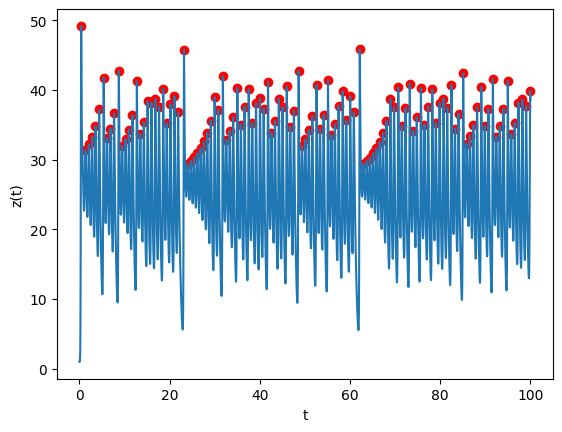

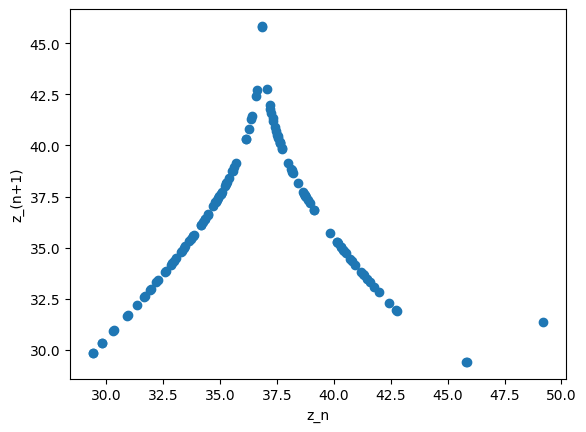

In [12]:
# finding z maxima 
z_max = []
t_max = []
for i in range(len(z) - 3):
    if z[i] < z[i+1] and z[i+1] > z[i+2]:
        z_max.append(z[i+1])
        t_max.append(t[i+1])

plt.scatter(t_max, z_max, color = 'r')
plt.plot(t,z)
plt.ylabel("z(t)")
plt.xlabel("t")

plt.show()

z_n1 = z_max[1:]
z_n = z_max[:len(z_max)-1]
plt.scatter(z_n,z_n1)
plt.ylabel("z_(n+1)")
plt.xlabel("z_n")
plt.show()
